In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [3]:
# Load datasets
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Display dataset summaries
print("Customers Dataset Preview:")
print(customers_df.head())
print("\nTransactions Dataset Preview:")
print(transactions_df.head())

Customers Dataset Preview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Transactions Dataset Preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [4]:
# Merge Customers and Transactions on CustomerID
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')

# Convert SignupDate to datetime and calculate days since signup
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])
merged_df['DaysSinceSignup'] = (pd.Timestamp.now() - merged_df['SignupDate']).dt.days

# Display merged dataset structure
print("\nMerged Dataset Structure:")
print(merged_df.head())


Merged Dataset Structure:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region SignupDate  \
0      300.68  300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68  300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68  300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36  300.68  Travis Campbell  South America 2024-04-11   
4      902.04  300.68    Timothy Perez         Europe 2022-03-15   

   DaysSinceSignup  
0              787  
1              146  
2              299  
3              292  
4             1050  


In [5]:
# One-hot encode the Region column
merged_df = pd.get_dummies(merged_df, columns=['Region'], drop_first=True)

In [6]:
# Select key features for clustering
clustering_features = merged_df[['TotalValue', 'Quantity', 'Price', 'DaysSinceSignup']]

# Fill any missing values
clustering_features.fillna(clustering_features.mean(), inplace=True)

<ipython-input-6-f1b9f4ef127c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features.fillna(clustering_features.mean(), inplace=True)


In [7]:
# Standardize the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

In [8]:
# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(scaled_features)

In [9]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, merged_df['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.3767781059224495


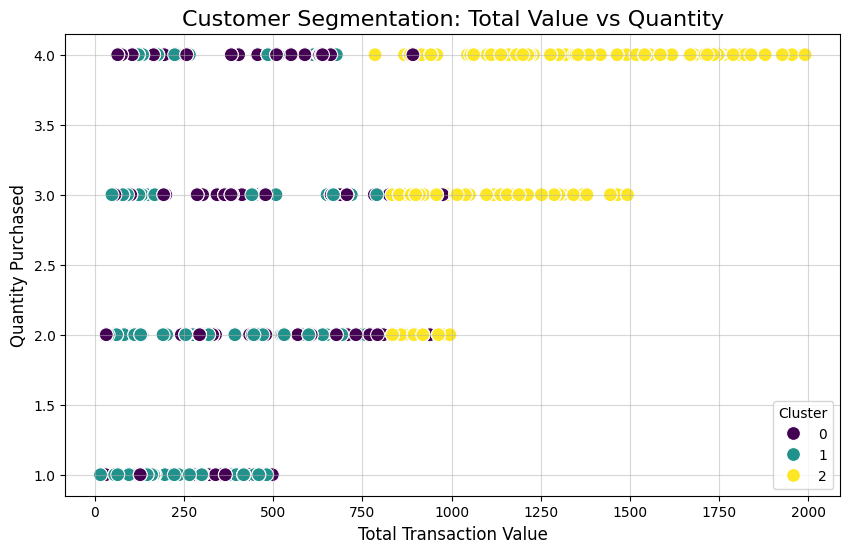

In [10]:
# Visualize clusters based on Total Value and Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=merged_df['TotalValue'],
    y=merged_df['Quantity'],
    hue=merged_df['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Segmentation: Total Value vs Quantity', fontsize=16)
plt.xlabel('Total Transaction Value', fontsize=12)
plt.ylabel('Quantity Purchased', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.grid(True, alpha=0.5)
plt.show()

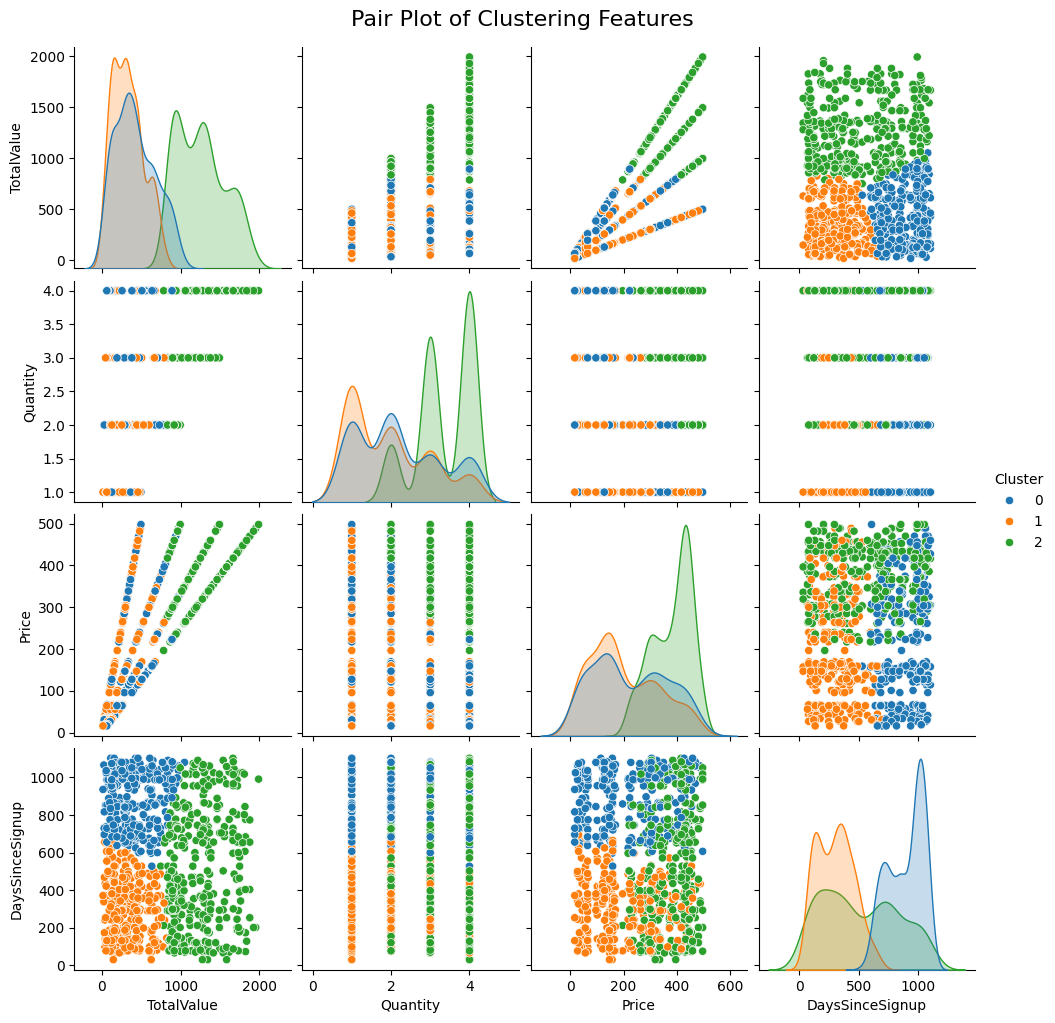

In [11]:
# Pair plot to examine cluster separation across features
sns.pairplot(
    merged_df[['TotalValue', 'Quantity', 'Price', 'DaysSinceSignup', 'Cluster']],
    hue='Cluster',
    palette='tab10'
)
plt.suptitle('Pair Plot of Clustering Features', y=1.02, fontsize=16)
plt.show()